In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [5]:
#import dataset
anxdata = pd.read_csv("anxiety_allbands_array.csv")

In [25]:
#datacheck
anxdata.shape
#anxdata.head

(202, 115)

# Splitting data

In [28]:
#data preprocessing
X = anxdata.drop('114', axis=1)
y = anxdata['114']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Applying and training on PCA data

In [29]:
#applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(202, 12)

In [30]:
X.shape
X_pca

array([[ 56.15939942, -73.96510075, -26.42824221, ...,   0.58609354,
          1.80760567,   1.94605646],
       [  6.83888573,  -1.52592678,  -8.69646791, ...,   4.50584835,
         -4.11061429,  -7.25789967],
       [262.1471957 , -98.71646765,   9.57960273, ...,  15.34638421,
          5.07738378,  13.65208923],
       ...,
       [-65.13680822,  35.8946682 , -24.29082044, ..., -19.52707421,
         13.83668358,   2.46804747],
       [103.68050799, -78.73211033, -93.62057653, ...,  12.03429698,
         13.41321305,   7.48075851],
       [172.26606891,  51.70139019, -23.82130747, ...,  11.81038173,
          3.07933989, -18.55830462]], shape=(202, 12))

In [31]:
pca.explained_variance_ratio_

array([0.649791  , 0.10303441, 0.077479  , 0.0368067 , 0.02037515,
       0.01487088, 0.01234851, 0.00959153, 0.00806893, 0.0074318 ,
       0.00598658, 0.00544621])

In [32]:
pca.n_components_

np.int64(12)

In [33]:
#new splitting test data using pca
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

# SVM Model

In [35]:
svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [38]:
y_pred = svclassifier.predict(X_test)
print(y_pred)

[0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0
 1 1 0 1]


In [39]:
svclassifier.score(X_test, y_test)

0.4878048780487805

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.37      0.40        19
           1       0.52      0.59      0.55        22

    accuracy                           0.49        41
   macro avg       0.48      0.48      0.48        41
weighted avg       0.48      0.49      0.48        41



In [41]:
y_scores = svclassifier.predict_proba(X_test)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.5406698564593302


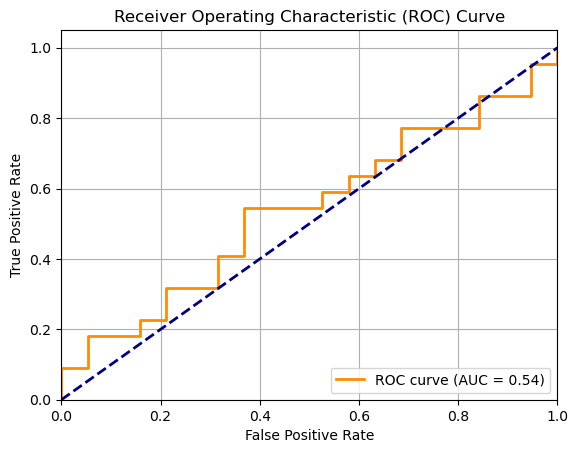

In [42]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# SVM for PCA

In [43]:
#new svm model from pca data
newsvm=SVC(kernel='linear', probability=True)
newsvm.fit(X_train_pca, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
y_pred = newsvm.predict(X_test_pca)
newsvm.score(X_test_pca, y_test)

0.5121951219512195

In [45]:
print(classification_report(y_test, y_pred))
print(y_pred)

              precision    recall  f1-score   support

           0       0.47      0.42      0.44        19
           1       0.54      0.59      0.57        22

    accuracy                           0.51        41
   macro avg       0.51      0.51      0.50        41
weighted avg       0.51      0.51      0.51        41

[1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1
 0 0 1 1]


0.5789473684210527


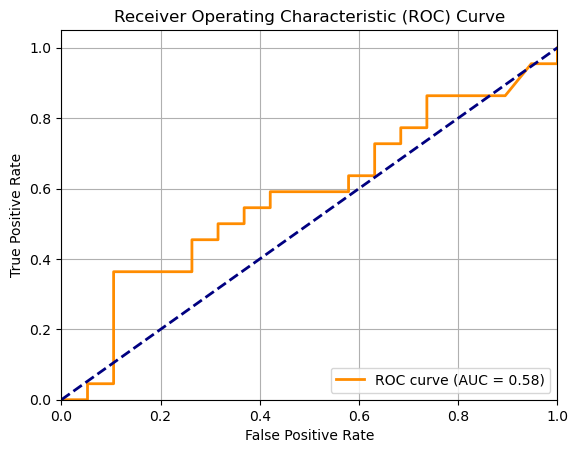

In [46]:
y_scores = newsvm.predict_proba(X_test_pca)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# KNN Model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [48]:
knn.score(X_test, y_test)

0.5853658536585366

In [49]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.63      0.59        19
           1       0.63      0.55      0.59        22

    accuracy                           0.59        41
   macro avg       0.59      0.59      0.59        41
weighted avg       0.59      0.59      0.59        41



0.5526315789473685


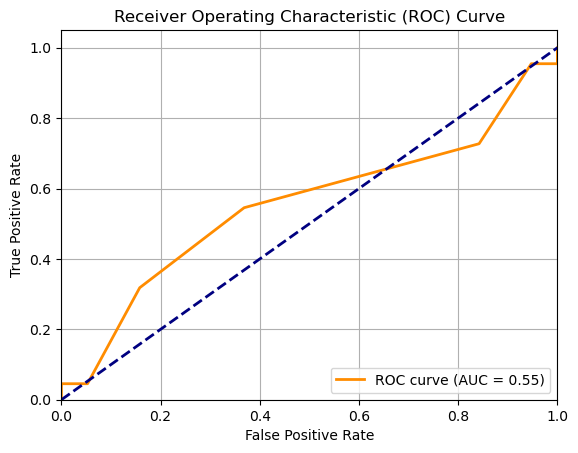

In [50]:
y_scores = knn.predict_proba(X_test)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# KNN for PCA

In [51]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_pca, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [52]:
knn.score(X_test_pca, y_test)

0.5121951219512195

In [53]:
y_pred = knn.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
cm
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.42      0.44        19
           1       0.54      0.59      0.57        22

    accuracy                           0.51        41
   macro avg       0.51      0.51      0.50        41
weighted avg       0.51      0.51      0.51        41



0.4688995215311005


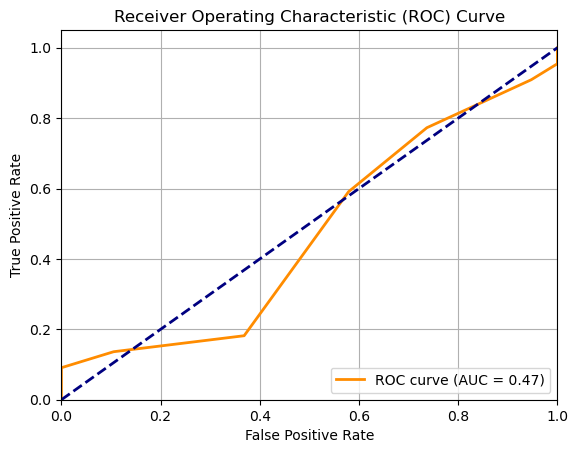

In [54]:
y_scores = knn.predict_proba(X_test_pca)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)

,n_estimators,40
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
model.score(X_test, y_test)

0.4878048780487805

In [57]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.47      0.46        19
           1       0.52      0.50      0.51        22

    accuracy                           0.49        41
   macro avg       0.49      0.49      0.49        41
weighted avg       0.49      0.49      0.49        41



0.4904306220095694


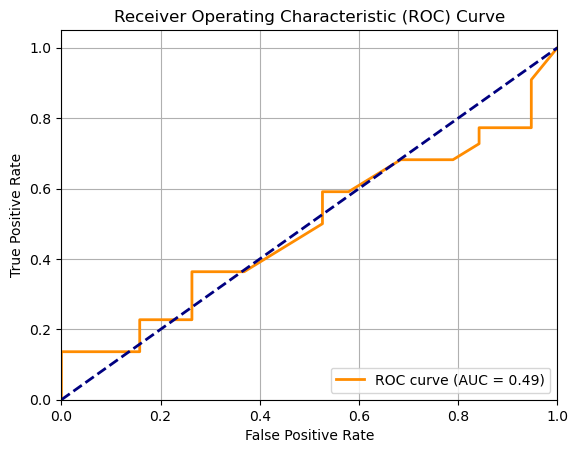

In [58]:
y_scores = model.predict_proba(X_test)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Random Forest for PCA

In [59]:
pmodel = RandomForestClassifier(n_estimators=40)
pmodel.fit(X_train_pca, y_train)

,n_estimators,40
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
pmodel.score(X_test_pca, y_test)

0.5121951219512195

In [61]:
y_pred = pmodel.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.42      0.44        19
           1       0.54      0.59      0.57        22

    accuracy                           0.51        41
   macro avg       0.51      0.51      0.50        41
weighted avg       0.51      0.51      0.51        41



0.4521531100478469


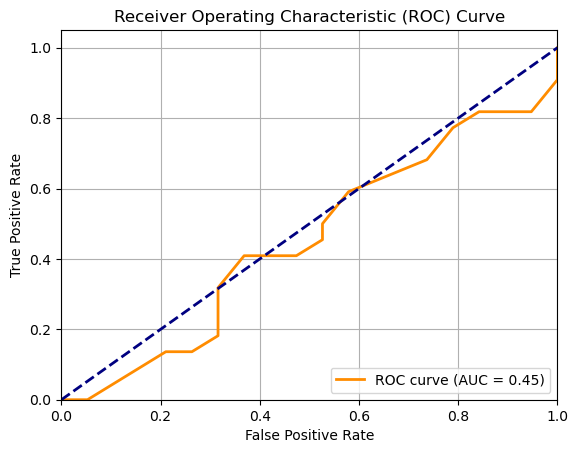

In [62]:
y_scores = pmodel.predict_proba(X_test_pca)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Logistic Regression Model

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()

In [65]:
model.fit(X_train, y_train)

/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [66]:
model.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [67]:
model.score(X_test, y_test)

0.3902439024390244

In [68]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.26      0.29        19
           1       0.44      0.50      0.47        22

    accuracy                           0.39        41
   macro avg       0.38      0.38      0.38        41
weighted avg       0.38      0.39      0.38        41



0.32057416267942584


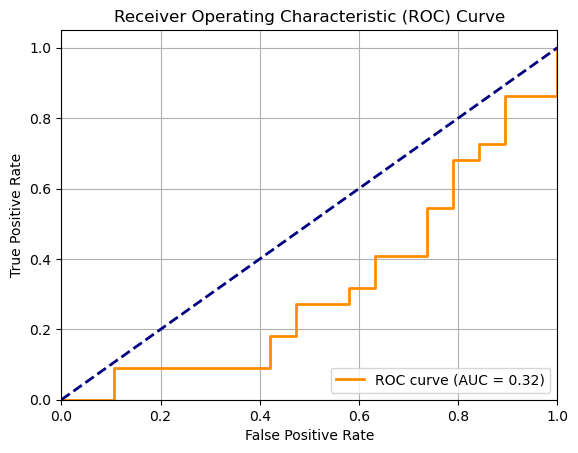

In [69]:
y_scores = model.predict_proba(X_test)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Logistic Regression for PCA

In [70]:
pmodel = LogisticRegression()

In [71]:
pmodel.fit(X_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [72]:
pmodel.predict(X_test_pca)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [73]:
pmodel.score(X_test_pca, y_test)

0.6097560975609756

In [74]:
y_pred = pmodel.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.47      0.53        19
           1       0.62      0.73      0.67        22

    accuracy                           0.61        41
   macro avg       0.61      0.60      0.60        41
weighted avg       0.61      0.61      0.60        41



0.583732057416268


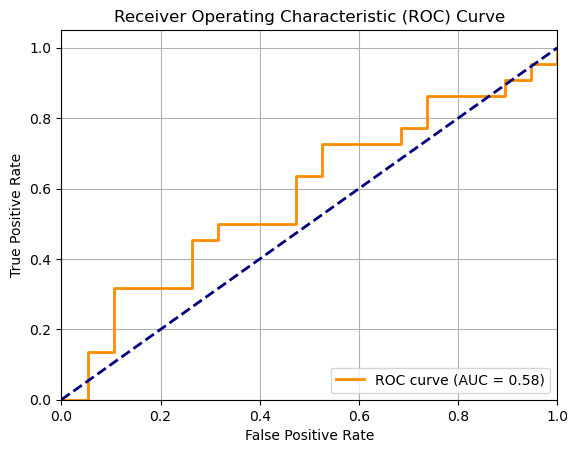

In [75]:
y_scores = pmodel.predict_proba(X_test_pca)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Elastic Net Regression

In [76]:
scaler = StandardScaler()

In [77]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [78]:
from sklearn.linear_model import ElasticNet

In [79]:
elastic_net = ElasticNet()

In [80]:
elastic_net.fit(X_train, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [81]:
y_pred = elastic_net.predict(X_test)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
mean_absolute_error(y_test, y_pred)

0.4979548553249507

In [84]:
mean_squared_error(y_test, y_pred)

0.2487360751852957

In [85]:
r2_score(y_test, y_pred)

-0.0002998621686174374

In [86]:
param_grid = {
    'alpha':[0.1,0.3,0.5,0.7,0.9,1.0],
    'l1_ratio':[0.1,0.3,0.5,0.7,0.9,1.0]
}

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
elastic_cv = GridSearchCV(elastic_net, param_grid, cv=3, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [89]:
elastic_cv.fit(X_train, y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [0.1, 0.3, ...], 'l1_ratio': [0.1, 0.3, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [90]:
y_pred2 = elastic_cv.predict(X_test)

In [91]:
mean_absolute_error(y_test, y_pred2)

0.4979548553249507

In [92]:
mean_squared_error(y_test, y_pred2)

0.2487360751852957

In [93]:
r2_score(y_test, y_pred2)

-0.0002998621686174374

# Elastic Net Regression PCA

In [94]:
scaler = StandardScaler()

In [95]:
pcaX_train = scaler.fit_transform(X_train_pca)
pcaX_test = scaler.fit_transform(X_test_pca)

In [96]:
elastic_net = ElasticNet()

In [97]:
elastic_net.fit(pcaX_train, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [98]:
y_pred = elastic_net.predict(pcaX_test)

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [100]:
mean_absolute_error(y_test, y_pred)

0.4979548553249507

In [101]:
mean_squared_error(y_test, y_pred)

0.2487360751852957

In [102]:
r2_score(y_test, y_pred)

-0.0002998621686174374

In [103]:
param_grid = {
    'alpha':[0.1,0.3,0.5,0.7,0.9,1.0],
    'l1_ratio':[0.1,0.3,0.5,0.7,0.9,1.0]
}

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
elastic_cv = GridSearchCV(elastic_net, param_grid, cv=3, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [106]:
elastic_cv.fit(pcaX_train, y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [0.1, 0.3, ...], 'l1_ratio': [0.1, 0.3, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.3


In [107]:
y_pred2 = elastic_cv.predict(pcaX_test)

In [108]:
mean_absolute_error(y_test, y_pred2)

0.4979548553249507

In [109]:
mean_squared_error(y_test, y_pred2)

0.2487360751852957

In [110]:
r2_score(y_test, y_pred2)

-0.0002998621686174374

# XGM Boost

In [111]:
import xgboost as xgb

In [112]:
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)

In [113]:
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])


[0]	validation_0-logloss:0.67077
[1]	validation_0-logloss:0.70133
[2]	validation_0-logloss:0.67041
[3]	validation_0-logloss:0.70484


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,2
,enable_categorical,False
,eval_metric,None


In [114]:
y_pred = clf.predict(X_test)

In [115]:
clf.score(X_test, y_test)

0.6097560975609756

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.53      0.56        19
           1       0.62      0.68      0.65        22

    accuracy                           0.61        41
   macro avg       0.61      0.60      0.60        41
weighted avg       0.61      0.61      0.61        41



0.6255980861244018


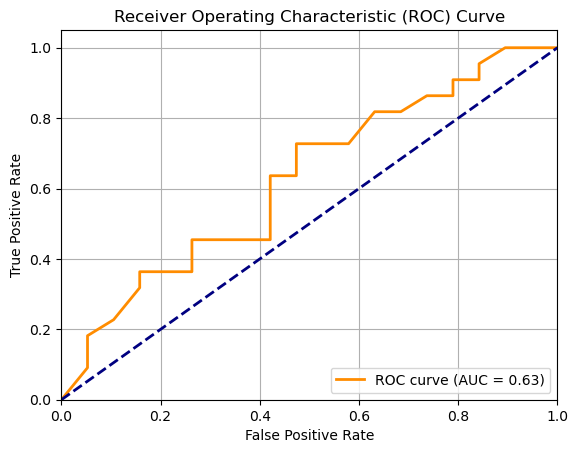

In [117]:
y_scores = clf.predict_proba(X_test)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# XGB PCA

In [118]:
pxgb = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)

In [119]:
pxgb.fit(X_train_pca, y_train, eval_set=[(X_test_pca, y_test)])

[0]	validation_0-logloss:0.71925
[1]	validation_0-logloss:0.70082
[2]	validation_0-logloss:0.73063


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,2
,enable_categorical,False
,eval_metric,None


In [120]:
pxgb.score(X_test_pca, y_test)

0.5365853658536586

In [121]:
y_pred = pxgb.predict(X_test_pca)

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.26      0.34        19
           1       0.55      0.77      0.64        22

    accuracy                           0.54        41
   macro avg       0.52      0.52      0.49        41
weighted avg       0.53      0.54      0.50        41



0.5633971291866029


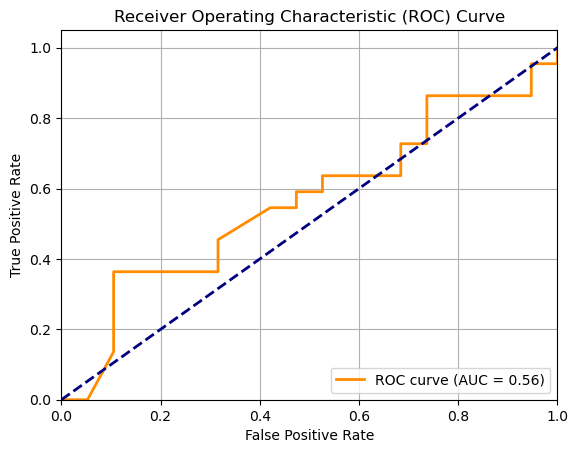

In [123]:
y_scores = pxgb.predict_proba(X_test_pca)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()